In [25]:
import sys
import os
if not any(path.endswith('textbook') for path in sys.path):
    sys.path.append(os.path.abspath('../../..'))
from textbook_utils import *          

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [27]:
run = (pd.read_csv('data/100m_sprint.csv', parse_dates=['date'])
       .assign(year=lambda df: df['date'].dt.year))

(ch:viz_context)=
# Adding Context


We have used text in our graphs throughout this chapter to provide meaningful axis labels that include units of measurement, tick-mark labels for categories, and titles. This is a good practice when sharing a visualization more broadly. A good goal is to include enough context in a plot so that it can stand alone---a reader should be able to get the gist of the plot without needing to search for explanation elsewhere. That said, every element of a statistical graph should have a purpose. 
Superfluous text or plot features, often referred to as _chartjunk_, should be eliminated.
In this section, we provide a brief overview of ways we can add helpful
context to our plots and an example where we create a publication-ready plot by adding context.

Text context includes *labels* and *captions*.
It is a good practice to consistently use informative labels on tick
marks and axes.
For example, axis labels often benefit from 
including units of measurement.
Graphs should contain
titles and legends when needed.
Informative labels are especially important
for plots that other people will see and interpret.
However, even when we're doing exploratory data analysis 
just for us, we often want
to include enough context so that when we later return to an analysis we can easily
figure out what we plotted.

Captions serve several purposes. They describe what has been plotted and orient the reader.
Captions also point out important features of the plot and comment on their implications.
It's OK for the caption to repeat information found in the text.
Readers often skim a publication and focus on section headings and visualizations, so plot captions should be self-contained.

*Reference markers* bring additional context to the plotting region. Reference points and lines that provide benchmarks, historical values, and other external information help form comparisons and interpretations.
For example, we often add a reference line with slope 1 to a quantile-quantile
plot.
We might also add a vertical line on a time-series plot to mark a special
event, like a natural disaster.

The following example demonstrates how to add these context elements to a plot. 

## Example: 100m Sprint Times

The following figure shows the race times in the men's 100-meter sprint since 1968. These data include only races that were electronically timed and held outdoors in normal wind conditions, and the times included are only for those runners who came in under 10 seconds. The plot is a basic scatter plot showing race time against year. Beginning with this plot, we augment it to create a plot featured in a [FiveThirtyEight article](https://fivethirtyeight.com/features/the-fastest-men-in-the-world-are-still-chasing-usain-bolt/) about the 100-meter sprint:

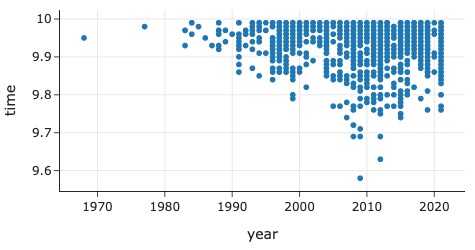

In [28]:
fig = px.scatter(run, x='year', y='time', hover_name='name',
                 width=450, height=250)
fig

When we want to prepare a plot for others to read, we consider the
takeaway message. In this case, our main message is twofold: the best runners have been getting faster over the past 50 years, and Usain Bolt's remarkable record time of 9.58 seconds set in 2009 remains untouched.
(In fact, the second-best race time also belongs to Bolt.)
We provide context to this plot by adding a title that directly states 
the main takeaway; units of measurement in the y-axis label; and annotations to key points in the scatter plot, including the two best race times that belong to Usain Bolt.
In addition, we add a horizontal reference line at 10 seconds to clarify that only times below 10 seconds are plotted, and we use a special symbol for the world record time to draw the reader's attention to this crucial point:

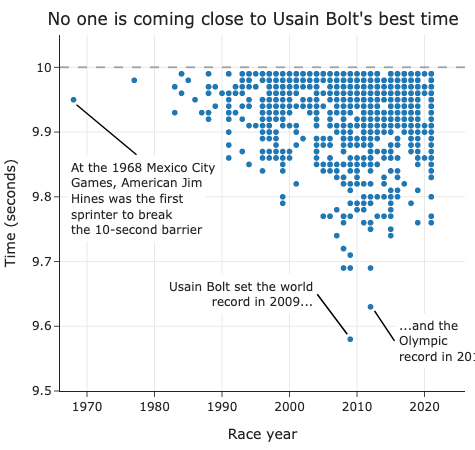

In [35]:
title_101 = "No one is coming close to Usain Bolt's best time"

fig = px.scatter(run, x='year', y='time', hover_name='name',
                 width=550, height=450)
fig.update_yaxes(range=[9.5, 10.05], title="Time (seconds)")
fig.update_xaxes(range=[1966, 2026], title="Race year")
margin(fig, t=35)
fig.update_layout(title=dict(text=title_101, y=0.97, x=0.1, xanchor='left'))

fig.add_hline(y=10.0, line_width=2, line_dash="dash", line_color="black")


hines = to_plotly_text('''
At the 1968 Mexico City
Games, American Jim
Hines was the first
sprinter to break
the 10-second barrier
''')

anno_params=dict(bgcolor='white',
                 borderpad=3,
                 arrowcolor='black',
                 showarrow=True,
                 arrowwidth=1.5)

fig.add_annotation(x=1968, y=9.95,
                   ax=60,
                   ay=50,
                   xshift=3,
                   yshift=-5,
                   yanchor='top',
                   text=hines,
                   align='left',
                   **anno_params)

fig.add_annotation(x=2009, y=9.58,
                   ax=-30,
                   ay=-40,
                   xshift=-3,
                   yshift=5,
                   xanchor='right',
                   text='Usain Bolt set the world<br>record in 2009...',
                   align='right',
                   **anno_params)

fig.add_annotation(x=2012, y=9.63,
                   ax=20,
                   ay=30,
                   xshift=4,
                   yshift=-4,
                   xanchor='left',
                   text='...and the<br>Olympic<br>record in 2012',
                   align='left',
                   **anno_params)

fig.show()

These bits of context describe what we have plotted, help readers 
see the main takeaway, and point out several interesting features in the data. 
The plot can now be a useful part of a slideshow, technical report, or social media post.
In our experience, people who look at our data analyses remember our plots, not paragraphs of text or equations.
It's important to go the extra mile and add context to the plots we prepare for others.

In the next section, we move on to specifics on how to create plots using the `plotly` Python package.